In [ ]:
#knitr::opts_chunk$set(echo = TRUE)

In [2]:
###install packages
library(dplyr)
library(ggplot2)
args=commandArgs(trailingOnly=TRUE) 

###Objective:This script is to put two categories based on expression of gene of interest (ex. MYC)
###Instruction: Pass 3 arguments (1: input matrix, 2: directory to output ("High" patients file), 3: directory to output ("Low" patients file))

In [11]:
###download data
data<-read.csv(args[1],sep="\t")
#test1="/sbgenomics/project-files/downsyndrome-gene-counts-rsem-expected_count-collapsed.tsv"
#data<-read.csv(test1,sep="\t")

#Put genenames as rownames
rownames(data)<-data$gene_id
data_gene<-data[,-1]

#Check whether data has expression level of gene of interest (ex. MYC) by checking rownames 
geneofinterest="MYC"
data_gene_rows <- rownames(data_gene) == geneofinterest
data_gene_myc<-(data_gene[data_gene_rows, ])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    806    1717    2104    2242    2695    5454 

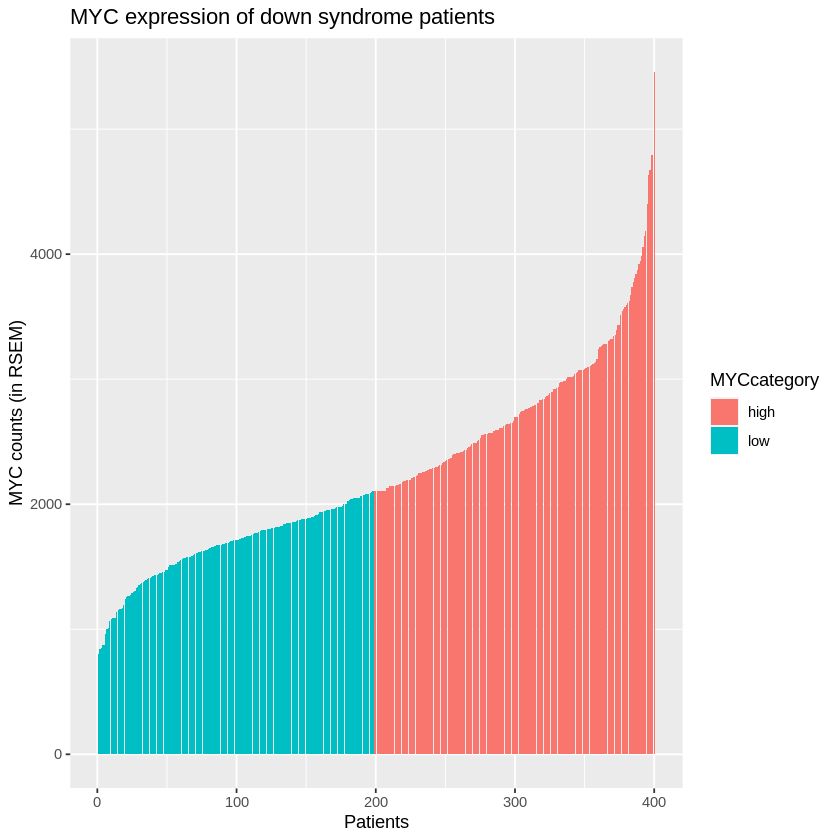

In [12]:
###Putting label high vs low on MYC expression
data_gene_t<-t(data_gene)
data_gene_t_df<-as.data.frame(data_gene_t)
data_gene_t_df<-data_gene_t_df[order(data_gene_t_df$MYC),]
#Find median of MYC expression
MYC_median<-median(data_gene_t_df$MYC)
#Add a new column "MYCcategory" that patient is assigned with a label ("high" or "low")
data_gene_t_df<-data_gene_t_df %>% mutate(MYCcategory = ifelse(MYC >= MYC_median,"high","low"))
#Return summary of MYC
summary(data_gene_t_df$MYC)
#Bar plots of MYC expression (including ranking based on MYC counts)
ggplot(data_gene_t_df, aes(x = seq_along(MYC), y = MYC,fill=MYCcategory)) +
  geom_bar(stat = "identity") +
  labs(x = "Patients", y = "MYC counts (in RSEM)", title = "MYC expression of down syndrome patients")

In [ ]:
###Export csv file of patients with "high" and "low" of gene of interest
#create dataframe of "high" MYC patients
data_gene_t_df_high<-data_gene_t_df[data_gene_t_df$MYCcategory == "high",]
data_Mychigh <- data_gene_t_df_high[, -ncol(data_gene_t_df_high)]
data_Mychigh_t<-t(data_Mychigh)
write.csv(data_Mychigh_t,file=arg[2])
#arg[2]="/sbgenomics/output-files/downsyndrome_Mychigh.csv"

#create dataframe of "low" MYC patients
data_gene_t_df_low<-data_gene_t_df[data_gene_t_df$MYCcategory == "low",]
data_Myclow <- data_gene_t_df_low[, -ncol(data_gene_t_df_low)]
data_Myclow_t<-t(data_Myclow)
write.csv(data_Mychigh_t,file=arg[3])
#arg[3]="/sbgenomics/output-files/downsyndrome_Myclow.csv")